#【課題】教師なし学習とは何か記述せよ  
教師あり学習との比較  
→教師あり学習：学習データにラベルが含まれていて、どのように分類するか明確である時に使われる。  
教師なし学習:　　データがどのような構造や特徴を持っているかを理解するために使われる。
（例：クラスタリング→学習データにラベルが含まれておらず、どのように分類するかが不明確である時にと使われる手法） 
  
どんなときに使うのか  
→手元にあるデータがどのように分類されるのか未知であるが、何らかの指標を元に分類したい時、データがどのような構造や特徴を持っているかを理解したい時  
  
具体的にどんなものがあるのか  
→K-means、PCA、特徴選択

In [92]:
#【課題】必要なライブラリをimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display




In [93]:
#【課題】csvファイルの読み込み
data = pd.read_csv("Wholesale customers data.csv")

#課題】不要な特徴量を消す
data_original = data.copy()
data=data.drop(["Channel","Region"],axis=1)

display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d7a0470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce57ef0>]], dtype=object)

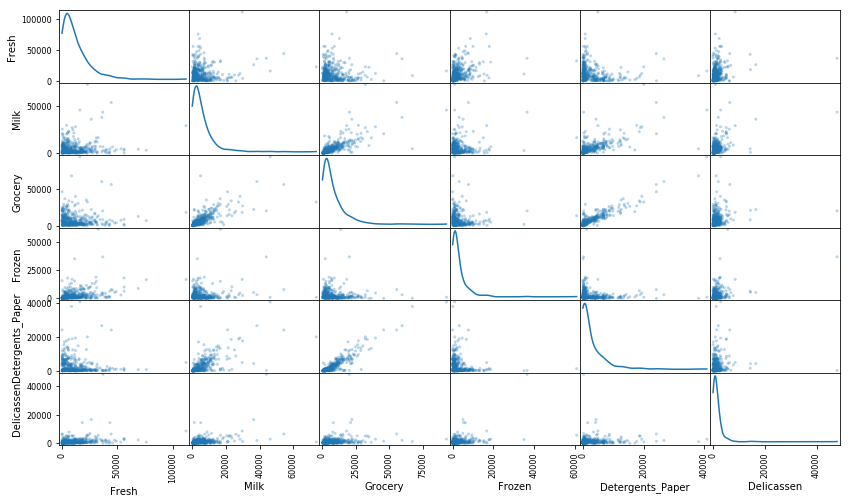

In [94]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')


In [95]:
#【課題】Feature Scalingの実行
data_fs = np.log(data)
#なぜlog?

#【課題】なぜFeature Scalingが必要なのか記述せよ  
単位が違うデータを数種類扱う場合、それぞれの種類のデータの大小が顕著であると学習がうまく行かないことがあるため

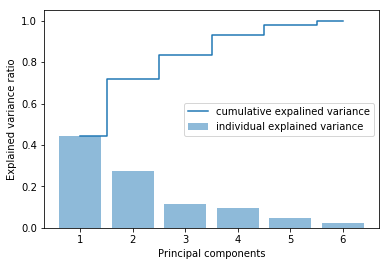

In [96]:
#課題】PCAの実行
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
temp_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()



In [97]:
#以上グラフより主成分２つで分散説明率が70%を超える
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_fs)

#課題】なぜPCAを行うのか記述せよ　　
→データを有効にしつつ計算時間を減らす

#課題】クラスタリングとは何か記述せよ  
いつ何に使うのか  
→ラベルなどがないデータを何らかの基準に従いグルーピングするために使う。  
  
階層的手法と非階層的手法との違い  
→階層的手法:あらかじめ何種類に分類するかを決めておかない。  
非階層的手法:あらかじめ何種類に分類するかを決めておく。  

クラス分類（classification）との比較  
→クラス分類は主に教師あり学習に置いて用いられ、クラスタリングは教師無し学習にて用いられる。

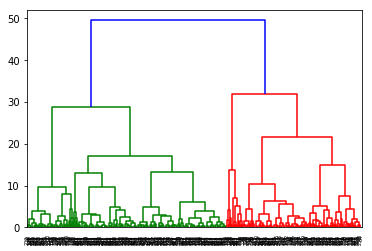

In [98]:
#【課題】樹状図を描く
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(data_pca, metric='euclidean'), method='ward')
row_dender = dendrogram(row_clusters)
plt.show()

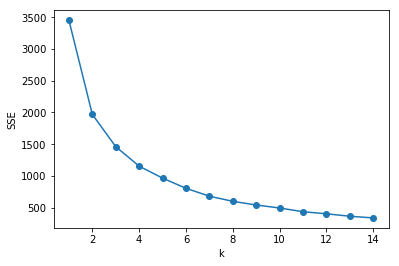

In [99]:
#【課題】k-meansにおけるkの値の検討  
from sklearn.cluster import KMeans
SSE=[]
for i in range(1,15):
    km =  KMeans( n_clusters=i)
    km.fit(data_pca)
    SSE.append(km.inertia_)

plt.plot(range(1,15),SSE,marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

k=2  
理由：上の　k-SSE曲線を見るとkがk=2より増えるとSSEの値の変化が緩やかになる。
これはk=2より増やすことは効率が悪くなることを示している。よってk=2とする。


In [100]:
#【課題】k-meansの実行
km =  KMeans( n_clusters=2)
y_km =km.fit_predict(data_pca)

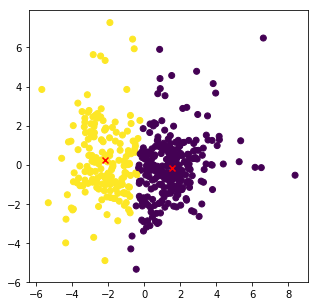

In [101]:
#【課題】クラスタリングの可視化
plt.figure(figsize=(5,5))
plt.scatter(data_pca[:,0],data_pca[:,1],c=y_km,marker="o")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="r",marker="x")
plt.show()

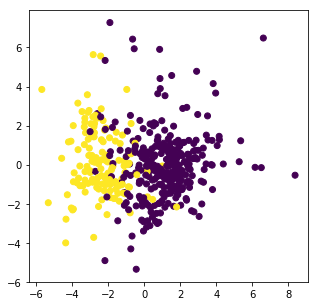

In [102]:
#【課題】既知のグループとの比較(Channel)

plt.figure(figsize=(5,5))
plt.scatter(data_pca[:,0],data_pca[:,1],c=data_original["Channel"].values,marker="o")
plt.show()

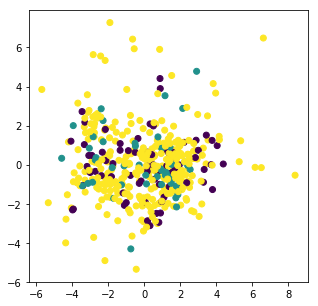

In [103]:
#【課題】既知のグループとの比較(Region)
plt.figure(figsize=(5,5))
plt.scatter(data_pca[:,0],data_pca[:,1],c=data_original["Region"].values,marker="o")
plt.show()

答え：k-meansの結果と"Channel"の元々の分類について、kmeansは2つの点からの距離の和がそれぞれ最小になるように分類されているため、綺麗に干渉なく２つにわかれている。"Channel"は元データのため少々の干渉が見られる。

#【課題】クラスタの説明：  
クラスタとは何か？  
→互いに似た性質を持ったデータの塊。どのような性質が似ているかは分類後に分析される。
  
どうしてわざわざクラスタリングをして、あたらしいクラスラベルと既存のクラスラベルchannel, regionとの比較をしたのかの 理由  
→クラスタリングをしただけだと、どのような性質が各クラスタ内で似ているかはわからない。比較をすることで、どのような性質が似ているかを分析し知ることができるため。  
      
  例えば注文額が小さい群と大きい群に対してそれぞれChannelを分けると有効な可能性がある。対してRegionは注文額とあまり関係はなさそうである。
